In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
from comet_ml import Experiment
import numpy as np
import scipy.spatial
import pandas as pd
import comet_ml
import sklearn.decomposition
import matplotlib.pyplot as plt
# import keras
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances,mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
from utils.readProfiles import readMergedProfiles,readMergedProfiles2
from utils.pred_models import *
from utils.saveAsNewSheetToExistingFile import saveAsNewSheetToExistingFile


# from utils import networksEvol, tsne, readProfiles
import umap

In [ ]:
meta_geneFamily

,approved_symbol,gene_group_name
0,A1BG,Immunoglobulin like domain containing
1,A1CF,RNA binding motif containing
2,A2M,"C3 and PZP like, alpha-2-macroglobulin domain ..."
3,A2ML1,"C3 and PZP like, alpha-2-macroglobulin domain ..."
4,A3GALT2,Glycosyltransferase family 6
...,...,...
24551,ZZEF1,EF-hand domain containing
24552,ZZEF1,Zinc fingers ZZ-type
24553,ZZZ3,ATAC complex
24554,ZZZ3,Myb/SANT domain containing


## gene_group_family_dictionary

In [3]:
# set(sorted_gene_mean_scores.index)
# pred_df
# sorted_gene_mean_scores
meta_geneFamily = pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/hgnc_gene_group_family_dictionary.csv")
genesU = meta_geneFamily.approved_symbol.unique().tolist()
meta_geneFamilyU=pd.DataFrame(index=range(len(genesU)),columns=["lmGens","gene_group_name"])
meta_geneFamilyU["lmGens"]=genesU
for i in range(len(genesU)):
    meta_geneFamilyU.loc[meta_geneFamilyU["lmGens"]==genesU[i],"gene_group_name"]=', '.join(meta_geneFamily[meta_geneFamily["approved_symbol"]==genesU[i]]["gene_group_name"].tolist())
# meta_geneFamilyU
# tips

In [389]:
# tips3
saved_scores2=pd.read_excel('../../results/SingleGenePred/scores.xlsx', sheet_name=None)

In [357]:
meta_geneFamilyU["gene_group_name"].unique()

array(['Immunoglobulin like domain containing',
       'RNA binding motif containing',
       'C3 and PZP like, alpha-2-macroglobulin domain containing', ...,
       'KNL1 complex', 'EF-hand domain containing, Zinc fingers ZZ-type',
       'ATAC complex, Myb/SANT domain containing, Zinc fingers ZZ-type'],
      dtype=object)

In [385]:
# saved_scores2=pd.read_excel('../../results/SingleGenePred/scores.xlsx', sheet_name=None)
saved_scores=pd.read_excel('../../results/SingleGenePred/scores_group.xlsx', sheet_name=None)
saved_scores.keys()

dict_keys(['Lasso-LUAD-fSel-dists-filt', 'Lasso-TAORF-fSel-dists-filt', 'Lasso-LINCS-fSel-dists-filt', 'Lasso-CDRP-bio-fSel-dists-filt', 'Lasso-LUAD-fSel-dists-filt-kG', 'Lasso-TAORF-fSel-dists-filt-kG', 'Lasso-LINCS-fSel-dists-filt-kG', 'Lasso-CDRP-bio-fSel-dists-filt-kG', 'Lasso-LUAD-fSel-dists-kG', 'Lasso-TAORF-fSel-dists-kG', 'Lasso-LINCS-fSel-dists-kG', 'Lasso-CDRP-bio-fSel-dists-kG', 'Lasso-LUAD-fSel-dists-kG2', 'Lasso-TAORF-fSel-dists-kG2', 'Lasso-LINCS-fSel-dists-kG2', 'Lasso-CDRP-bio-fSel-dists-kG2', 'Lasso-LUAD-fSel-dists-filt-kG2', 'Lasso-LINCS-fSel-dists-filt-kG2', 'Lasso-CDRP-bio-fSel-dists-filt-kG2', 'Lasso-TAORF-fSel-dists-filt-kG2', 'MLP-TAORF-fSel-dists-filt-kG2', 'MLP-LUAD-fSel-dists-filt-kG2', 'MLP-LINCS-fSel-dists-filt-kG2', 'MLP-CDRP-bio-fSel-dists-filt-kG2'])

In [189]:
res_sheet=saved_scores['MLP-TAORF-fSel-dists']
d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
# axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
#     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
#         pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values

In [190]:
res_sheet[res_sheet['d']=='n-folds'].groupby(['lmGens']).size()

lmGens
AARS      5
ABCB6     5
ABCC5     5
ABCF1     5
ABCF3     5
         ..
ZNF395    5
ZNF451    5
ZNF586    5
ZNF589    5
ZW10      5
Length: 978, dtype: int64

<IPython.core.display.Javascript object>


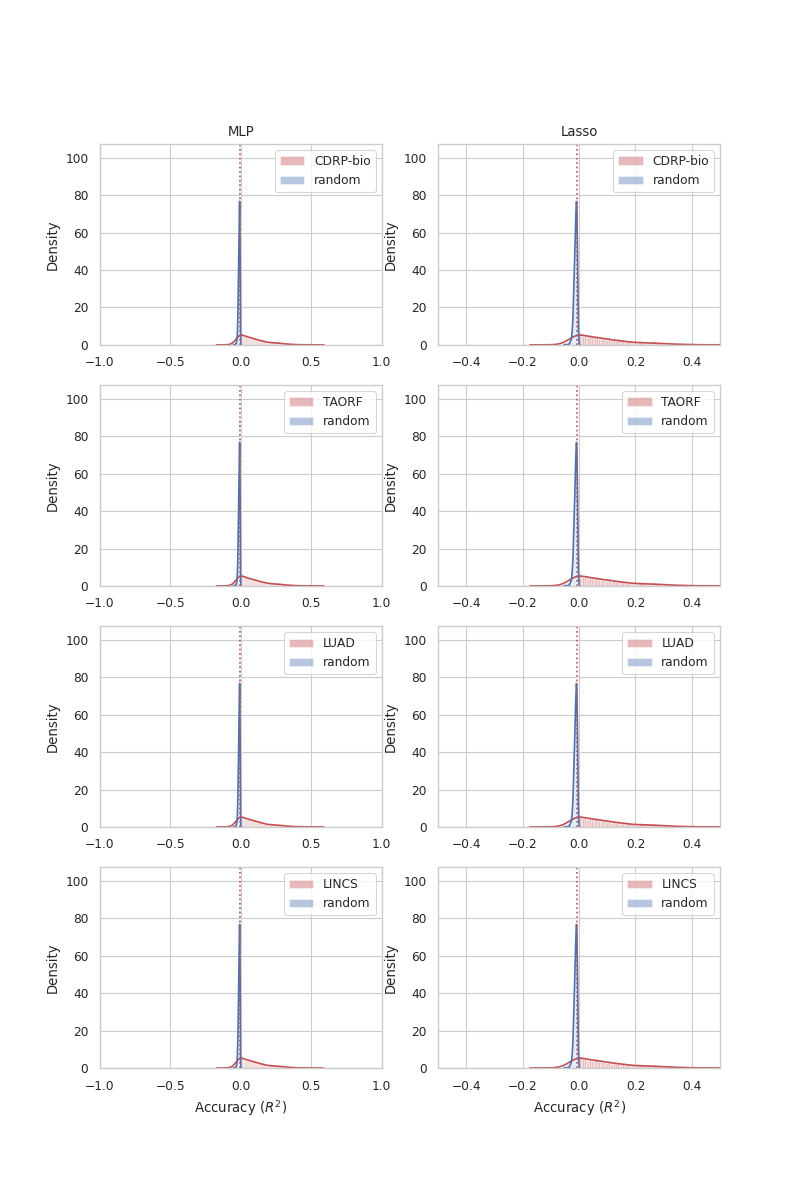

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.005819534085122368
-0.005819534085122368


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.005819534085122368
-0.005819534085122368
1


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.005819534085122368
1
-0.005819534085122368


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

1
-0.005819534085122368
1
-0.005819534085122368


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [495]:
datasets=['CDRP-bio' , 'TAORF', 'LUAD','LINCS']
models=["MLP","Lasso"]
f='-filt';#'-filt'

DataPredResults=pd.DataFrame(columns=["Dataset","Model"])
# i=0
# for d in ['Filtered','All']:
#     for m in ['CP','GE','CP+GE']:
#         temp_df=pd.DataFrame(data=Acc_all2[i],columns=['acc'])
#         temp_df['Modality']=m
#         temp_df['Data']=d        
#         i+=1
#         DataFuseResults=DataFuseResults.append(temp_df)


fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
#     for f in ['','-filt']:
#         if datasets[d]=='CDRP-bio':
#         if datasets[d]=='LINCS': 
#             if models[m]=='MLP':
#                 f=''
#             else:
#                 f=''
#         else:
#             f=''
        if datasets[d]=='LUAD' or datasets[d]=='LINCS':
            res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-kG2']
            print(1)
        else:
            res_sheet=saved_scores2[models[m]+'-'+datasets[d]+'-fSel-dists'+'']

#         res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-kG2']
            
        d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        
        d_to_pl_2=d_to_pl.copy()
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        DataPredResults=DataPredResults.append(d_to_pl_2)
        
        # axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
        #     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
        pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
#         pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values
        rand_scoress=d_to_pl[d_to_pl["d"]=="random"]["pred score"].values
#         rand_scoress=res_sheet[res_sheet['d']=='random']["pred score"].values
        sns.distplot(pred_scoress,kde=True,hist=True,bins=100,label=datasets[d],ax=axes[d,m],norm_hist=True,color='r')
        sns.distplot(rand_scoress,kde=True,hist=True,bins=100,label='random',ax=axes[d,m],norm_hist=True)
        print(np.percentile(rand_scoress,90))
        axes[d,0].set_xlim(-1,1)
        axes[d,1].set_xlim(-.5,.5)
#         axes[d,m].set_xlim(-0.5,0.6)
#         axes[d,m].set_ylim(0,15)
        axes[d,m].axvline(x=np.percentile(rand_scoress,90),linestyle=':',color='r');
        axes[len(datasets)-1,m].set_xlabel("Accuracy ($R^2$)");
        axes[d,m].legend();
        axes[0,m].set_title(models[m]);

In [379]:
DataPredResults.groupby(['Dataset','Model','lmGens','d']).size()

Dataset   Model  lmGens  d      
CDRP-bio  Lasso  AARS    n-folds    1
                         random     1
                 ABAT    n-folds    1
                         random     1
                 ABCB6   n-folds    1
                                   ..
TAORF     Lasso  ZNF586  random     1
                 ZNF589  n-folds    1
                         random     1
                 ZW10    n-folds    1
                         random     1
Length: 7822, dtype: int64

In [380]:
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     140
LINCS     Lasso     164
LUAD      Lasso    2172
dtype: int64

In [370]:
DataPredResults

,Dataset,Model,lmGens,d,Unnamed: 0,pred score
0,CDRP-bio,Lasso,AARS,n-folds,4148.5,0.241617
1,CDRP-bio,Lasso-random,AARS,random,10010.5,-0.112710
2,CDRP-bio,Lasso,ABAT,n-folds,1754.5,0.013925
3,CDRP-bio,Lasso-random,ABAT,random,7616.5,-0.104120
4,CDRP-bio,Lasso,ABCB6,n-folds,3992.5,-0.044803
...,...,...,...,...,...,...
1951,LINCS,Lasso-random,ZNF586,random,41337.0,-0.018683
1952,LINCS,Lasso,ZNF589,n-folds,18837.0,0.019117
1953,LINCS,Lasso-random,ZNF589,random,43287.0,-0.006977
1954,LINCS,Lasso,ZW10,n-folds,21012.0,0.028173


<IPython.core.display.Javascript object>


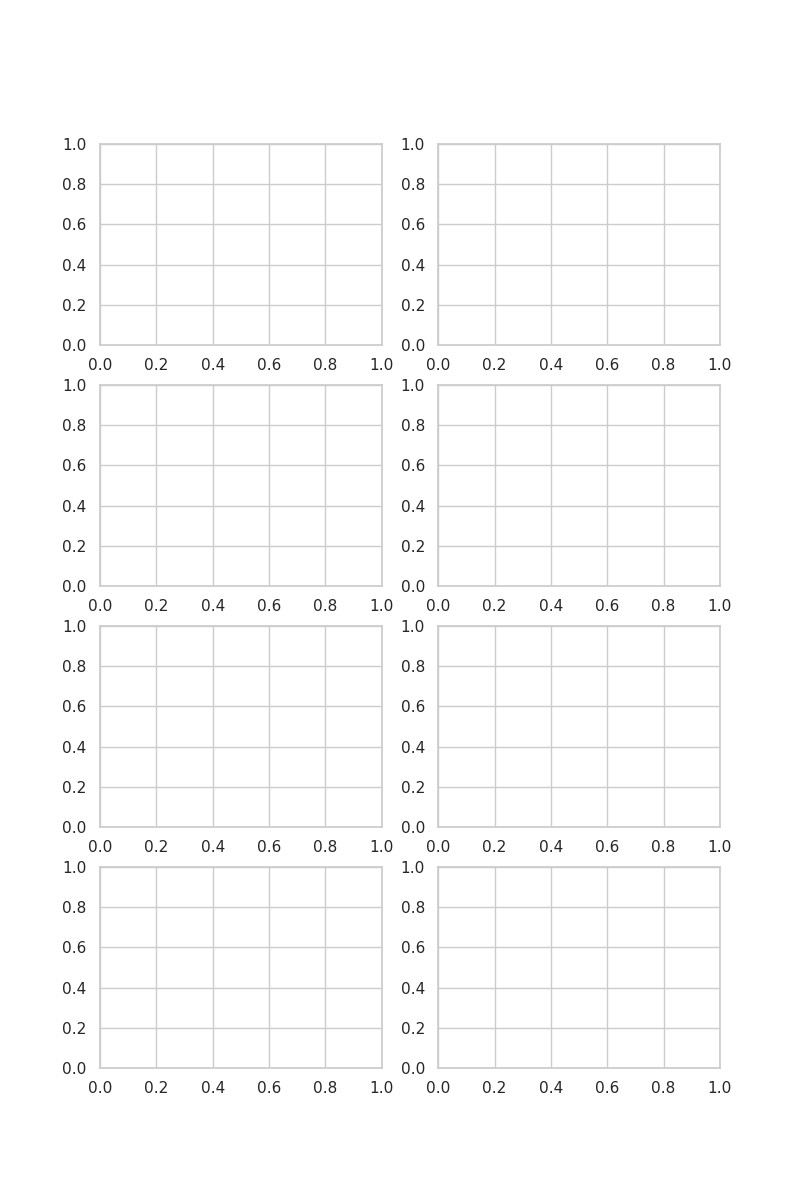

KeyError: 'Lasso-CDRP-bio-fSel-dists'

In [456]:
datasets=['CDRP-bio' , 'LUAD', 'TAORF','LINCS']
models=["Lasso","Lasso"]
f='';#'-filt'

DataPredResults=pd.DataFrame(columns=["Dataset","Model"])
# i=0
# for d in ['Filtered','All']:
#     for m in ['CP','GE','CP+GE']:
#         temp_df=pd.DataFrame(data=Acc_all2[i],columns=['acc'])
#         temp_df['Modality']=m
#         temp_df['Data']=d        
#         i+=1
#         DataFuseResults=DataFuseResults.append(temp_df)


fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
#     for f in ['','-filt']:
#         if datasets[d]=='CDRP-bio':
#         if datasets[d]=='LINCS': 
#             if models[m]=='MLP':
#                 f=''
#             else:
#                 f=''
#         else:
#             f=''
        res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f]
        d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        
        d_to_pl_2=d_to_pl.copy()
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        DataPredResults=DataPredResults.append(d_to_pl_2)
        
        # axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
        #     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
        pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
#         pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values
        rand_scoress=d_to_pl[d_to_pl["d"]=="random"]["pred score"].values
#         rand_scoress=res_sheet[res_sheet['d']=='random']["pred score"].values
        sns.distplot(pred_scoress,kde=True,hist=True,bins=100,label=datasets[d],ax=axes[d,m],norm_hist=True,color='r')
        sns.distplot(rand_scoress,kde=True,hist=True,bins=100,label='random',ax=axes[d,m],norm_hist=True)
        print(np.percentile(rand_scoress,90))
        axes[d,0].set_xlim(-1,1)
        axes[d,1].set_xlim(-.5,.5)
#         axes[d,m].set_xlim(-0.5,0.6)
#         axes[d,m].set_ylim(0,15)
        axes[d,m].axvline(x=np.percentile(rand_scoress,90),linestyle=':',color='r');
        axes[len(datasets)-1,m].set_xlabel("Accuracy ($R^2$)");
        axes[d,m].legend();
        axes[0,m].set_title(models[m]);

<IPython.core.display.Javascript object>


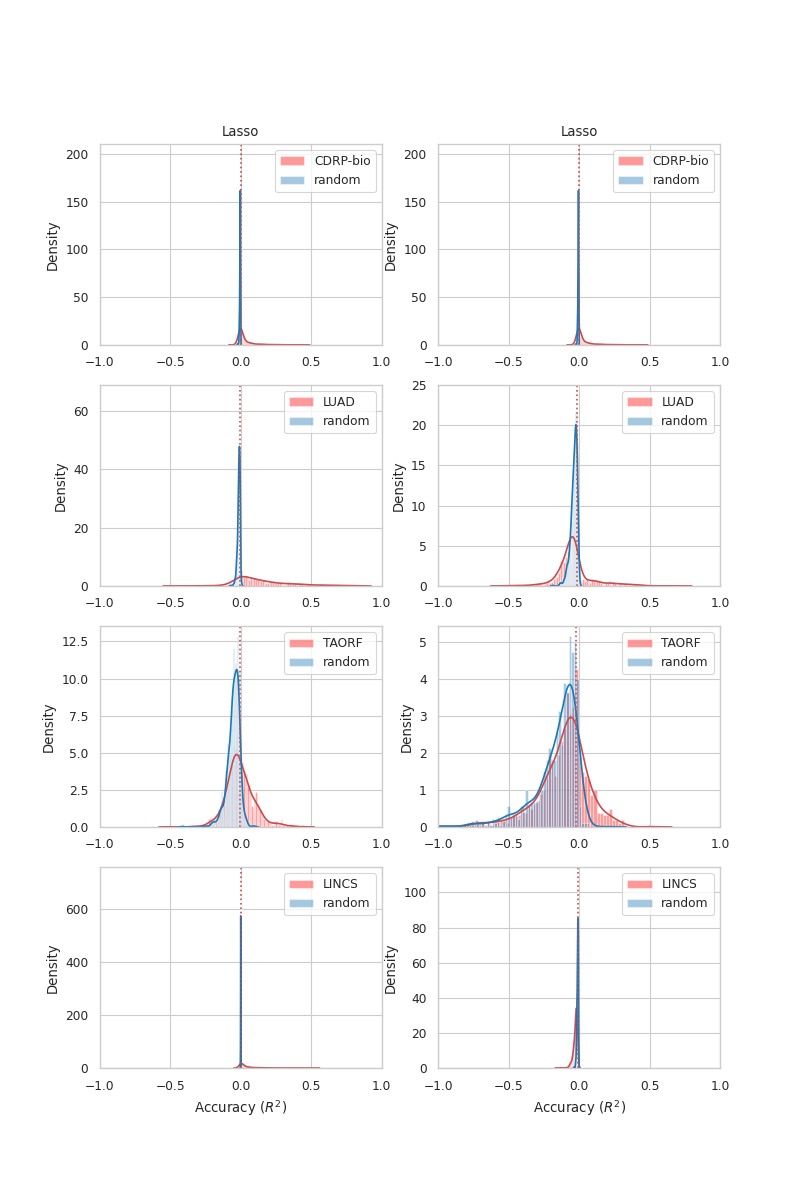

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.0026091097337195947


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.0026091097337195947


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

-0.004593063042019229


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.01139130949985924


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.006891544237845859


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.022108757760133362


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.0006816579848574418
-0.004486067198964693


/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [209]:
datasets=['CDRP-bio' , 'LUAD', 'TAORF','LINCS']
models=["Lasso","Lasso"]

fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
#     for m in range(len(models)):
    m=0
    for f in ['','-filt']:
        if datasets[d]=='CDRP-bio':
            f=''
        res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f]
        d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        # axes=sns.displot(data=d_to_pl, x="pred score", hue="d")
        #     sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
        pred_scoress=d_to_pl[d_to_pl["d"]=="n-folds"]["pred score"].values
#         pred_scoress=res_sheet[res_sheet['d']=='n-folds']["pred score"].values
        rand_scoress=d_to_pl[d_to_pl["d"]=="random"]["pred score"].values
#         rand_scoress=res_sheet[res_sheet['d']=='random']["pred score"].values
        sns.distplot(pred_scoress,kde=True,hist=True,bins=100,label=datasets[d],ax=axes[d,m],norm_hist=True,color='r')
        sns.distplot(rand_scoress,kde=True,hist=True,bins=100,label='random',ax=axes[d,m],norm_hist=True)
        print(np.percentile(rand_scoress,90))
        axes[d,m].set_xlim(-1,1)
#         axes[d,m].set_xlim(-0.5,0.6)
#         axes[d,m].set_ylim(0,15)
        axes[d,m].axvline(x=np.percentile(rand_scoress,90),linestyle=':',color='r');
        axes[len(datasets)-1,m].set_xlabel("Accuracy ($R^2$)");
        axes[d,m].legend();
        axes[0,m].set_title(models[m]);
        m+=1

In [149]:
np.percentile(rand_scoress,99)

-0.00034806880631441095

<IPython.core.display.Javascript object>


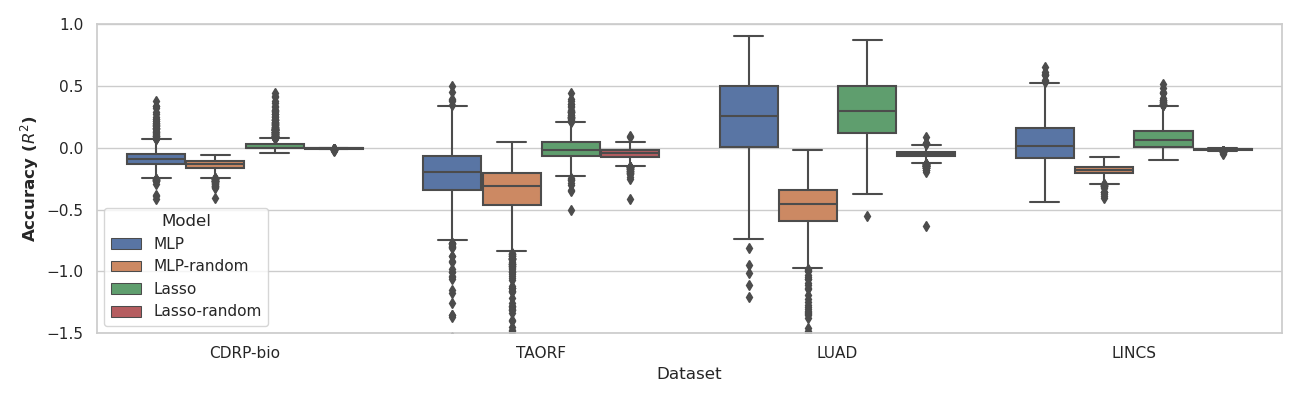

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [435]:
# DataPredResults
import matplotlib.style as style
style.use('seaborn-colorblind')
sns.set_context("paper",font_scale = 2, rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":10})

# DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(13,4))

# plt.rcParams["axes.labelsize"] = 40
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score", hue="Model",data=DataPredResults)
ax.set_ylim(-1.5,1);
ax.set_ylabel("Accuracy ($R^2$)", fontweight='bold'); #fontsize=14,
plt.tight_layout()
plt.savefig('pred_gen_all_models.eps')


<IPython.core.display.Javascript object>


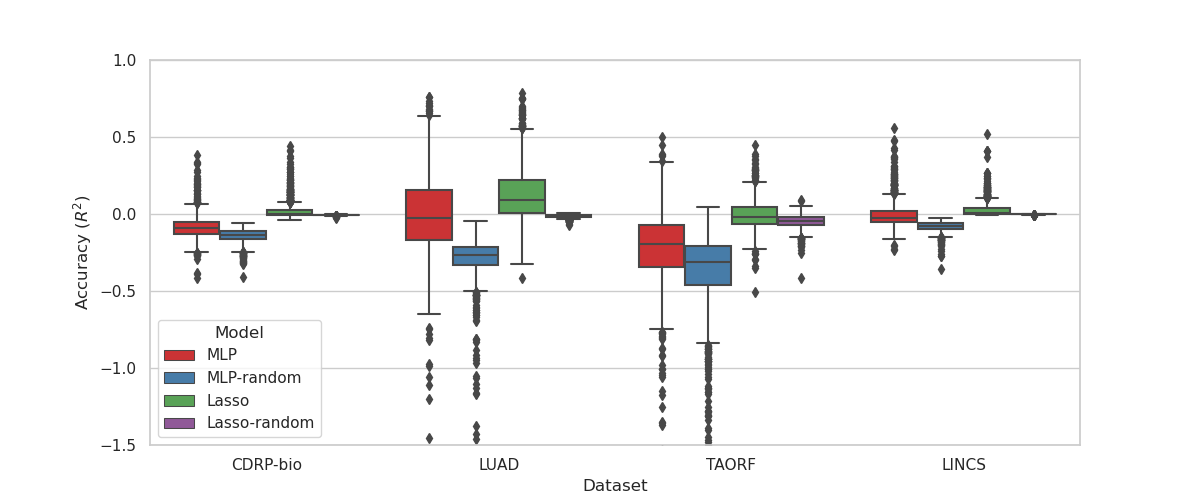

In [339]:
DataPredResults.loc[DataPredResults['d']=='random','Model']=DataPredResults[DataPredResults['d']=='random']['Model']+'-'+DataPredResults[DataPredResults['d']=='random']['d']
plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Dataset", y="pred score", hue="Model",data=DataPredResults, palette="Set1")
ax.set_ylim(-1.5,1);
ax.set_ylabel("Accuracy ($R^2$)");

In [340]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
# DataPredResults2
# mean_scores_df_top=
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()*(100/978)

Dataset   Model
CDRP-bio  Lasso     1.635992
          MLP       0.613497
LINCS     Lasso     0.817996
          MLP       2.556237
LUAD      Lasso    22.290389
          MLP      16.462168
TAORF     Lasso     2.044990
          MLP       2.044990
dtype: float64

In [454]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
# DataPredResults2
# mean_scores_df_top=
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()*(100/978)

Dataset   Model
CDRP-bio  Lasso     1.635992
          MLP       0.613497
LINCS     Lasso     8.384458
          MLP      13.394683
LUAD      Lasso    55.521472
          MLP      50.920245
TAORF     Lasso     2.044990
          MLP       2.044990
dtype: float64

In [437]:
DataPredResults[DataPredResults["pred score"]>0.25].groupby(['Dataset','Model','d']).size()*(100/978)

Dataset   Model  d      
CDRP-bio  Lasso  n-folds     1.635992
          MLP    n-folds     0.613497
LINCS     Lasso  n-folds     8.384458
          MLP    n-folds    13.394683
LUAD      Lasso  n-folds    55.521472
          MLP    n-folds    50.920245
TAORF     Lasso  n-folds     2.044990
          MLP    n-folds     2.044990
dtype: float64

In [341]:
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     16
          MLP        6
LINCS     Lasso      8
          MLP       25
LUAD      Lasso    218
          MLP      161
TAORF     Lasso     20
          MLP       20
dtype: int64

In [436]:
DataPredResults2=DataPredResults.loc[DataPredResults['d']!='random'].reset_index(drop=True)
DataPredResults2[DataPredResults2["pred score"]>0.25].groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso     16
          MLP        6
LINCS     Lasso     82
          MLP      131
LUAD      Lasso    543
          MLP      498
TAORF     Lasso     20
          MLP       20
dtype: int64

In [ ]:
Dataset   Model
CDRP-bio  Lasso     1.635992
          MLP       0.613497
LINCS     Lasso     8.384458
          MLP      13.394683
LUAD      Lasso    55.521472
          MLP      50.920245
TAORF     Lasso     2.044990
          MLP       2.044990
    
    Dataset   Model
CDRP-bio  Lasso     16
          MLP        6
LINCS     Lasso     82
          MLP      131
LUAD      Lasso    543
          MLP      498
TAORF     Lasso     20
          MLP       20
dtype: int64

In [382]:
DataPredResults2.groupby(['Dataset','Model']).size()

Dataset   Model
CDRP-bio  Lasso    977
LINCS     Lasso    978
LUAD      Lasso    978
TAORF     Lasso    978
dtype: int64

In [304]:
CDRP_lgens=set(dff[dff['Dataset']=='CDRP-bio'].lmGens.tolist()[0])
LINCS_lgens=set(dff[dff['Dataset']=='LINCS'].lmGens.tolist()[0])
LUAD_lgens=set(dff[dff['Dataset']=='LUAD'].lmGens.tolist()[0])
TAORF_lgens=set(dff[dff['Dataset']=='TAORF'].lmGens.tolist()[0])

In [312]:
print(len(CDRP_lgens & LINCS_lgens))
print(len(CDRP_lgens & LUAD_lgens))
print(len(CDRP_lgens & TAORF_lgens))
print(len(LUAD_lgens & TAORF_lgens))
print(len(LUAD_lgens & LINCS_lgens))
print(len(LINCS_lgens & TAORF_lgens))

785
785
785
978
978
978


In [355]:
print(len(CDRP_lgens))

977


In [331]:
from venn import venn


# musicians = {
#     "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
#     "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
#     "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
# }
# venn(musicians)

In [329]:
list_4_ven

{'CDRP-bio': set(),
 'LINCS': {'ABCB6',
  'AKAP8L',
  'ATF6',
  'ATP1B1',
  'AURKA',
  'B3GNT1',
  'BIRC5',
  'BLCAP',
  'BLVRA',
  'C5',
  'CAT',
  'CCDC92',
  'CCNA2',
  'CDC2',
  'CDC25B',
  'CDK2',
  'CDK4',
  'CDKN1A',
  'CETN3',
  'CHEK2',
  'CRYZ',
  'CTSD',
  'DDB2',
  'DDIT4',
  'DRAP1',
  'EIF4EBP1',
  'ELOVL6',
  'FAS',
  'FOSL1',
  'FRS2',
  'GADD45A',
  'GLRX',
  'GRN',
  'HIST2H2BE',
  'HMGA2',
  'IGF2R',
  'IGFBP3',
  'INPP1',
  'ITGB5',
  'JUN',
  'KIF14',
  'KLHDC2',
  'LBR',
  'LIPA',
  'LPGAT1',
  'MAN2B1',
  'MELK',
  'MRPL12',
  'MVP',
  'NFKBIB',
  'NIPSNAP1',
  'NOLC1',
  'NPC1',
  'NUP88',
  'P4HA2',
  'PAFAH1B3',
  'PAICS',
  'PGM1',
  'PLK1',
  'PLSCR1',
  'POLE2',
  'PSMG1',
  'PTPN12',
  'PTPN6',
  'PTPRF',
  'PXN',
  'PYCR1',
  'RAE1',
  'RAP1GAP',
  'SESN1',
  'SMC4',
  'SRC',
  'TERF2IP',
  'TIMP2',
  'TOP2A',
  'TOPBP1',
  'TP53',
  'TPM1',
  'UBE2C',
  'USP1',
  'YKT6',
  'ZFP36'},
 'LUAD': {'AARS',
  'ABHD4',
  'ADAM10',
  'ANO10',
  'APP',
  'APPBP2',

In [2]:
mean_scores_df_top=DataPredResults2[DataPredResults2["pred score"]>0.25].reset_index(drop=True)

list_4_ven={}
dsets=["CDRP-bio","LINCS","LUAD", "TAORF"]
set_lab=tuple(dsets) 
# plt.figure()
for d in dsets:
    list_4_ven[d]=set(mean_scores_df_top[mean_scores_df_top["Dataset"]==d].lmGens)

# venn(list_4_ven,legend_loc='upper center')
venn(list_4_ven,legend_loc='lower left')

# venn3(list_4_ven,set_labels=set_lab)
# # venn2([set(mean_scores_df_top["da"]), set(Course2)])
# plt.show()

NameError: name 'DataPredResults2' is not defined

In [349]:
mean_scores_df_top

,Dataset,Model,lmGens,d,Unnamed: 0,pred score
0,CDRP-bio,MLP,CCNF,n-folds,17429.5,0.286831
1,CDRP-bio,MLP,DDIT4,n-folds,8409.5,0.274874
2,CDRP-bio,MLP,HERPUD1,n-folds,7529.5,0.380575
3,CDRP-bio,MLP,HMGCS1,n-folds,5329.5,0.333848
4,CDRP-bio,MLP,MYC,n-folds,11649.5,0.323933
...,...,...,...,...,...,...
469,LINCS,Lasso,CDKN1A,n-folds,8589.5,0.411447
470,LINCS,Lasso,MELK,n-folds,12729.5,0.266907
471,LINCS,Lasso,POLE2,n-folds,18789.5,0.266042
472,LINCS,Lasso,TOP2A,n-folds,7809.5,0.516707


In [316]:
len(LUAD_lgens)

978

In [290]:
dff=DataPredResults2.groupby(['Dataset']).lmGens.unique().reset_index()


for (indx1,row1),(indx2,row2) in zip(dff[:-1].iterrows(),dff[1:].iterrows()):
#     print(indx1,row1)
#     print(indx2,row2)
    print(set())

0 Dataset                                             CDRP-bio
lmGens     [AARS, ABAT, ABCB6, ABCC5, ABCF1, ABCF3, ABHD4...
Name: 0, dtype: object
1 Dataset                                                LINCS
lmGens     [AARS, ABCB6, ABCC5, ABCF1, ABCF3, ABHD4, ABHD...
Name: 1, dtype: object
1 Dataset                                                LINCS
lmGens     [AARS, ABCB6, ABCC5, ABCF1, ABCF3, ABHD4, ABHD...
Name: 1, dtype: object
2 Dataset                                                 LUAD
lmGens     [AARS, ABCB6, ABCC5, ABCF1, ABCF3, ABHD4, ABHD...
Name: 2, dtype: object
2 Dataset                                                 LUAD
lmGens     [AARS, ABCB6, ABCC5, ABCF1, ABCF3, ABHD4, ABHD...
Name: 2, dtype: object
3 Dataset                                                TAORF
lmGens     [AARS, ABCB6, ABCC5, ABCF1, ABCF3, ABHD4, ABHD...
Name: 3, dtype: object


In [102]:
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS'

saved_scores=pd.read_excel('../../results/SingleGenePred/scores.xlsx', sheet_name=None)
datasets=['CDRP' , 'LUAD', 'TAORF', 'LINCS','random'];
filter_status=['','','-all','','-all']
# filter_status=['-all','-all','-all','-all','-all']
# filter_status=['','','','','']

mean_scores=[]
for d in range(len(datasets)):
    saved_scores_lasso=saved_scores['Lasso-'+datasets[d]+filter_status[d]]
    print(np.median(saved_scores_lasso.pred_score.values))
    saved_scores_lasso['dataset']=datasets[d]
    mean_scores.append(saved_scores_lasso);
    print(saved_scores_lasso.shape)
    
    
mean_scores_df = pd.concat(mean_scores,ignore_index=True)
mean_scores_df_top=mean_scores_df[mean_scores_df["pred_score"]>0.3]
mean_scores_df.head()

0.001357073089134686
(977, 4)
0.10608280757652311
(978, 4)
-0.05955282553053882
(978, 4)
0.09271211427482817
(978, 4)
-0.0002667463098579015
(977, 4)


,Unnamed: 0,lm_Gens,pred_score,dataset
0,562,TOP2A,0.347744,CDRP
1,290,CCNA2,0.294425,CDRP
2,403,HMGCR,0.290164,CDRP
3,871,CCNF,0.265335,CDRP
4,266,HMGCS1,0.262251,CDRP


In [55]:
datasets

['CDRP', 'LUAD', 'TAORF', 'LINCS', 'random']

<IPython.core.display.Javascript object>


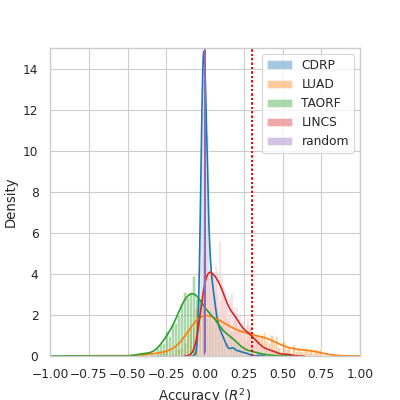

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

In [103]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
for d in range(5):#(len(datasets)):
    sns.distplot(saved_scores['Lasso-'+datasets[d]+filter_status[d]].pred_score.values,kde=True,hist=True,bins=100,label=datasets[d],ax=axes,norm_hist=True);
    axes.set_xlim(-1,1)
    axes.set_ylim(0,15)
    axes.axvline(x=.3,linestyle=':',color='r');
    axes.set_xlabel("Accuracy ($R^2$)");
    axes.legend();#axes[i].set_title(title[i]);

<IPython.core.display.Javascript object>


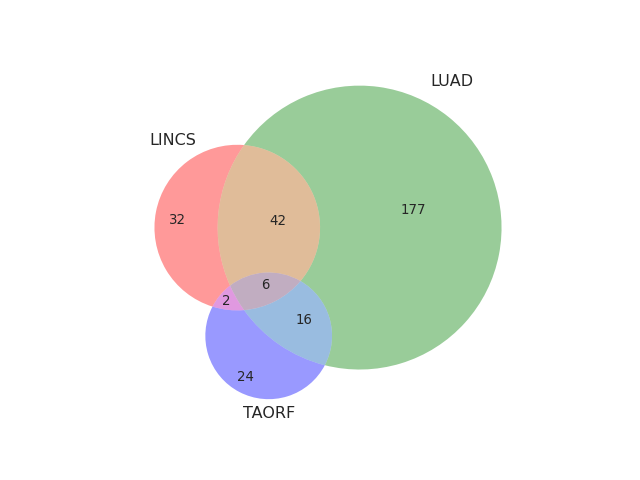

In [100]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
list_4_ven=[]
dsets=["LINCS","LUAD", "TAORF"]
set_lab=tuple(dsets) 
plt.figure()
for d in dsets:
    list_4_ven.append(set(mean_scores_df_top[mean_scores_df_top["dataset"]==d].lm_Gens))
venn3(list_4_ven,set_labels=set_lab)
# venn2([set(mean_scores_df_top["da"]), set(Course2)])
plt.show()

In [42]:
saved_scores['Lasso-LUAD'][0:50][["lm_Gens","pred_score"]].to_csv("tempTop.csv")

In [101]:
# meta_geneFamily.approved_symbol.unique().shape,meta_geneFamily.shape
percDf=mean_scores_df_top.groupby("dataset").size().reset_index()
percDf = percDf.rename(columns={0:"n-pert"})
percDf["%top"]=(percDf["n-pert"]/978).round(3)
percDf["top n(%)"]=percDf["n-pert"].astype(str)+'('+percDf["%top"].astype(str)+')'
percDf["cell-type"]=["U2OS","A549","A549","U2OS"]
percDf["pert-type"]=["chemical","chemical","genetic","genetic"]
# mean_scores_df_top["percentage"]=mean_scores_df_top[]
percDf[["dataset","cell-type","pert-type","top n(%)"]]

,dataset,cell-type,pert-type,top n(%)
0,CDRP,U2OS,chemical,1(0.001)
1,LINCS,A549,chemical,82(0.084)
2,LUAD,A549,genetic,241(0.246)
3,TAORF,U2OS,genetic,48(0.049)


In [76]:
# meta_geneFamily[meta_geneFamily["approved_symbol"].isin(pred_df.columns.tolist())].groupby(['approved_symbol']).reset_index()
# pred_df
# mean_scores_df
set(mean_scores_df_top[mean_scores_df_top["dataset"]=="CDRP"].lm_Gens)

set()

In [75]:
percDf

,dataset,n-pert,%top
0,LINCS,11,0.011247
1,LUAD,183,0.187117
2,TAORF,15,0.015337


In [160]:
# meta_geneFamily.groupby("approved_symbol").size()

In [110]:
# pred_df_rand
# sorted_gene_mean_scores
# highPredDF
# highPredDF_rand
# import seaborn
# sns.__version__

# import seaborn as sns
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
#                     data=tips, palette="muted", split=True)

In [112]:
# tips.dtypes

In [205]:
# tips.lmGens.unique()
# tips2.d
# meta_gene_probID.index, 
# meta_gene_probID['gene']
# d
highPredDF.lmGens.unique().tolist()

['CDKN1A',
 'CDC2',
 'CCNA2',
 'GADD45A',
 'YKT6',
 'POLE2',
 'BIRC5',
 'SERPINE1',
 'USP1',
 'DCK',
 'UBE2C',
 'TIMELESS',
 'AURKA',
 'ATF1',
 'SLC2A6',
 'COL4A1',
 'RPIA',
 'MRPL12',
 'DNAJB2',
 'MELK',
 'CDK2',
 'FHL2',
 'MVP',
 'JUN',
 'CDC25A',
 'RAE1',
 'NPEPL1',
 'AURKB',
 'SMC4',
 'MCM3',
 'POP4',
 'TPM1',
 'SUV39H1',
 'RPL39L',
 'CHEK2',
 'EZH2',
 'CASC3',
 'TOP2A',
 'MYL9',
 'LSM6',
 'MAN2B1',
 'CAT',
 'POLB',
 'CCL2',
 'LBR',
 'PPIE',
 'NUSAP1',
 'TIMP2',
 'MYBL2',
 'GMNN']

In [460]:
DataPredResults

,Dataset,Model,lmGens,d,Unnamed: 0,pred score
0,CDRP-bio,MLP,AARS,n-folds,13829.5,-0.071415
1,CDRP-bio,MLP,AARS,random,33369.5,-0.114975
2,CDRP-bio,MLP,ABAT,n-folds,5849.5,-0.192280
3,CDRP-bio,MLP,ABAT,random,25389.5,-0.086167
4,CDRP-bio,MLP,ABCB6,n-folds,13309.5,-0.086835
...,...,...,...,...,...,...
1951,LINCS,Lasso,ZNF586,random,41337.0,-0.018683
1952,LINCS,Lasso,ZNF589,n-folds,18837.0,0.019117
1953,LINCS,Lasso,ZNF589,random,43287.0,-0.006977
1954,LINCS,Lasso,ZW10,n-folds,21012.0,0.028173


In [494]:
dataset_meth_dists.groupby(['lmGens']).size()#.median().reset_index()

lmGens
AARS      2
ABCB6     2
ABCC5     2
ABCF1     2
ABCF3     2
         ..
ZNF395    2
ZNF451    2
ZNF586    2
ZNF589    2
ZW10      2
Length: 978, dtype: int64

In [474]:
# DataPredResults[(DataPredResults['Dataset']==datasets[0]) & (DataPredResults['Model']=='Lasso')]
sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['lmGens','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
sorted_gene_mean_scores

,lmGens,d,Unnamed: 0,pred score
359,HERPUD1,n-folds,7529.5,0.441948
661,PSRC1,n-folds,8529.5,0.418314
113,CCNF,n-folds,17429.5,0.409959
111,CCNA2,n-folds,5809.5,0.377227
877,TOP2A,n-folds,11249.5,0.364963
...,...,...,...,...
691,RAP1A,n-folds,629.5,-0.018111
923,USP1,n-folds,6509.5,-0.019015
846,TFAP2A,n-folds,9069.5,-0.022172
351,HBE1,n-folds,7329.5,-0.032636


In [499]:
# sorted_gene_mean_scores[0:50]
# sorted_gene_mean_scores
# top_lmGenes
# dataset_meth_dists_top_50
# DataPredResults_appendix=DataPredResults.copy()

datasets=['CDRP-bio' , 'TAORF', 'LUAD','LINCS']
models=["MLP","Lasso"]
f='-filt';#'-filt'

DataPredResults=pd.DataFrame(columns=["Dataset","Model"])

fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
#     for f in ['','-filt']:
#         if datasets[d]=='CDRP-bio':
#         if datasets[d]=='LINCS': 
#             if models[m]=='MLP':
#                 f=''
#             else:
#                 f=''
#         else:
#             f=''
        if datasets[d]=='LUAD' or datasets[d]=='LINCS':
            res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-kG2']
            print(1)
        else:
            res_sheet=saved_scores2[models[m]+'-'+datasets[d]+'-fSel-dists'+'']

#         res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-kG2']
        d_to_pl_2=res_sheet.copy()
            
#         d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        
#         d_to_pl_2=d_to_pl.copy()
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        DataPredResults=DataPredResults.append(d_to_pl_2)


<IPython.core.display.Javascript object>


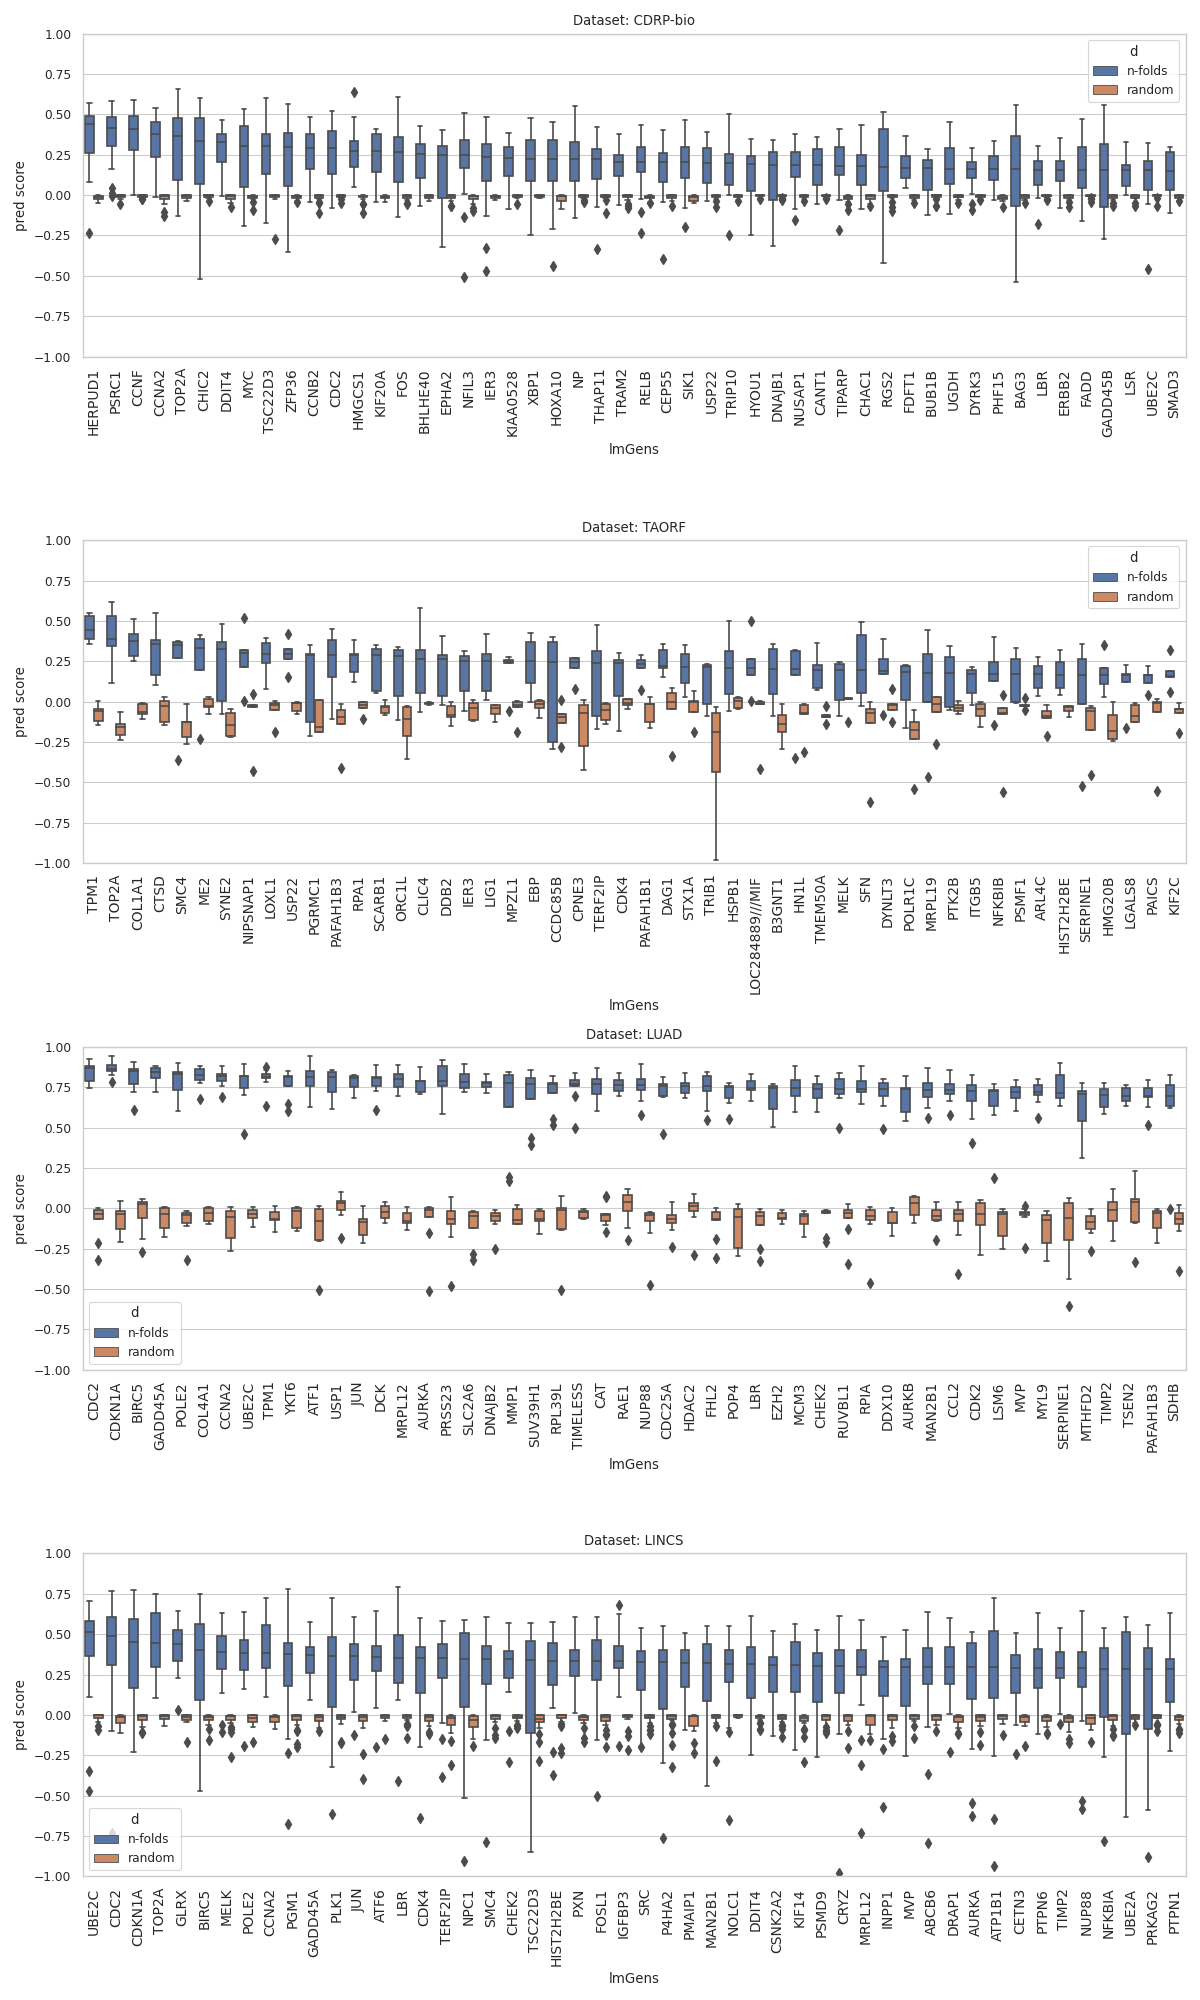

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [510]:
datasets=['CDRP-bio' , 'TAORF', 'LUAD','LINCS']
models=["Lasso"]
f='-filt';#'-filt'

fig, axes = plt.subplots(len(datasets),1,figsize=(12,20))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        dataset_meth_dists=DataPredResults_appendix[(DataPredResults_appendix['Dataset']==datasets[d]) &\
                                                    (DataPredResults_appendix['Model']==models[m])]
        sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['lmGens','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
        top_lmGenes=sorted_gene_mean_scores['lmGens'].tolist()[0:50]
        dataset_meth_dists_top_50=dataset_meth_dists[dataset_meth_dists['lmGens'].isin(top_lmGenes)]
        
#         f, axes = plt.subplots(figsize=(15,4))
        axes[d].set_title("Dataset: "+datasets[d])
        sns.boxplot(x="lmGens", y="pred score",hue="d", data=dataset_meth_dists_top_50,ax=axes[d],order=top_lmGenes)
        # ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
        axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
        axes[d].set_ylim(-1, 1)
        
fig.tight_layout()
fig.savefig('appendix_B.eps')

In [515]:
saved_scores=pd.read_excel('../../results/SingleCPfeatPred/scores.xlsx', sheet_name=None)
saved_scores.keys()

dict_keys(['Lasso-LINCS', 'Lasso-LUAD', 'Lasso-TAORF', 'Lasso-LUAD-dists-filt-paper', 'Lasso-TAORF-dists-filt-paper', 'Lasso-LINCS-dists-filt-paper', 'Lasso-LUAD-dists-paper', 'Lasso-TAORF-dists-paper', 'Lasso-LINCS-dists-paper', 'Lasso-CDRP-bio-dists-paper', 'Lasso-CDRP-bio-dists-filt-paper'])

In [527]:
DataPredResults_appC

,Dataset,Model,Unnamed: 0,CP-Features,pred score,d
0,CDRP-bio,Lasso,0.0,Nuclei_Correlation_K_AGP_Mito,0.598645,n-folds
1,CDRP-bio,Lasso,1.0,Nuclei_Correlation_K_AGP_Mito,0.562363,n-folds
2,CDRP-bio,Lasso,2.0,Nuclei_Correlation_K_AGP_Mito,0.147169,n-folds
3,CDRP-bio,Lasso,3.0,Nuclei_Correlation_K_AGP_Mito,0.699455,n-folds
4,CDRP-bio,Lasso,4.0,Nuclei_Correlation_K_AGP_Mito,0.645042,n-folds
...,...,...,...,...,...,...
66795,LINCS,Lasso,66795.0,Cells_Granularity_8_AGP,-0.003150,random
66796,LINCS,Lasso,66796.0,Cells_Granularity_8_AGP,-0.000889,random
66797,LINCS,Lasso,66797.0,Cells_Granularity_8_AGP,-0.006785,random
66798,LINCS,Lasso,66798.0,Cells_Granularity_8_AGP,0.005098,random


In [521]:
# sorted_gene_mean_scores[0:50]
# sorted_gene_mean_scores
# top_lmGenes
# dataset_meth_dists_top_50
# DataPredResults_appendix=DataPredResults.copy()

datasets=['CDRP-bio' , 'TAORF', 'LUAD','LINCS']
models=["Lasso"]
f='-filt';#'-filt'

DataPredResults_appC=pd.DataFrame(columns=["Dataset","Model"])

# fig, axes = plt.subplots(len(datasets),len(models),figsize=(4*len(models),3*len(datasets)))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-dists'+f+'-paper']
#         if datasets[d]=='CDRP-bio':
#             res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-dists'+f+'-paper']
#         else:
#             res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-paper']            
#         if datasets[d]=='LUAD' or datasets[d]=='LINCS':
#             res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-kG2']
#             print(1)
#         else:
#             res_sheet=saved_scores2[models[m]+'-'+datasets[d]+'-fSel-dists'+'']

#         res_sheet=saved_scores[models[m]+'-'+datasets[d]+'-fSel-dists'+f+'-kG2']
        d_to_pl_2=res_sheet.copy()
            
#         d_to_pl=res_sheet.groupby(['lmGens','d']).median().reset_index()   
        
#         d_to_pl_2=d_to_pl.copy()
        d_to_pl_2['Dataset']=datasets[d]
        d_to_pl_2['Model']=models[m]
        
        DataPredResults_appC=DataPredResults_appC.append(d_to_pl_2)

<IPython.core.display.Javascript object>


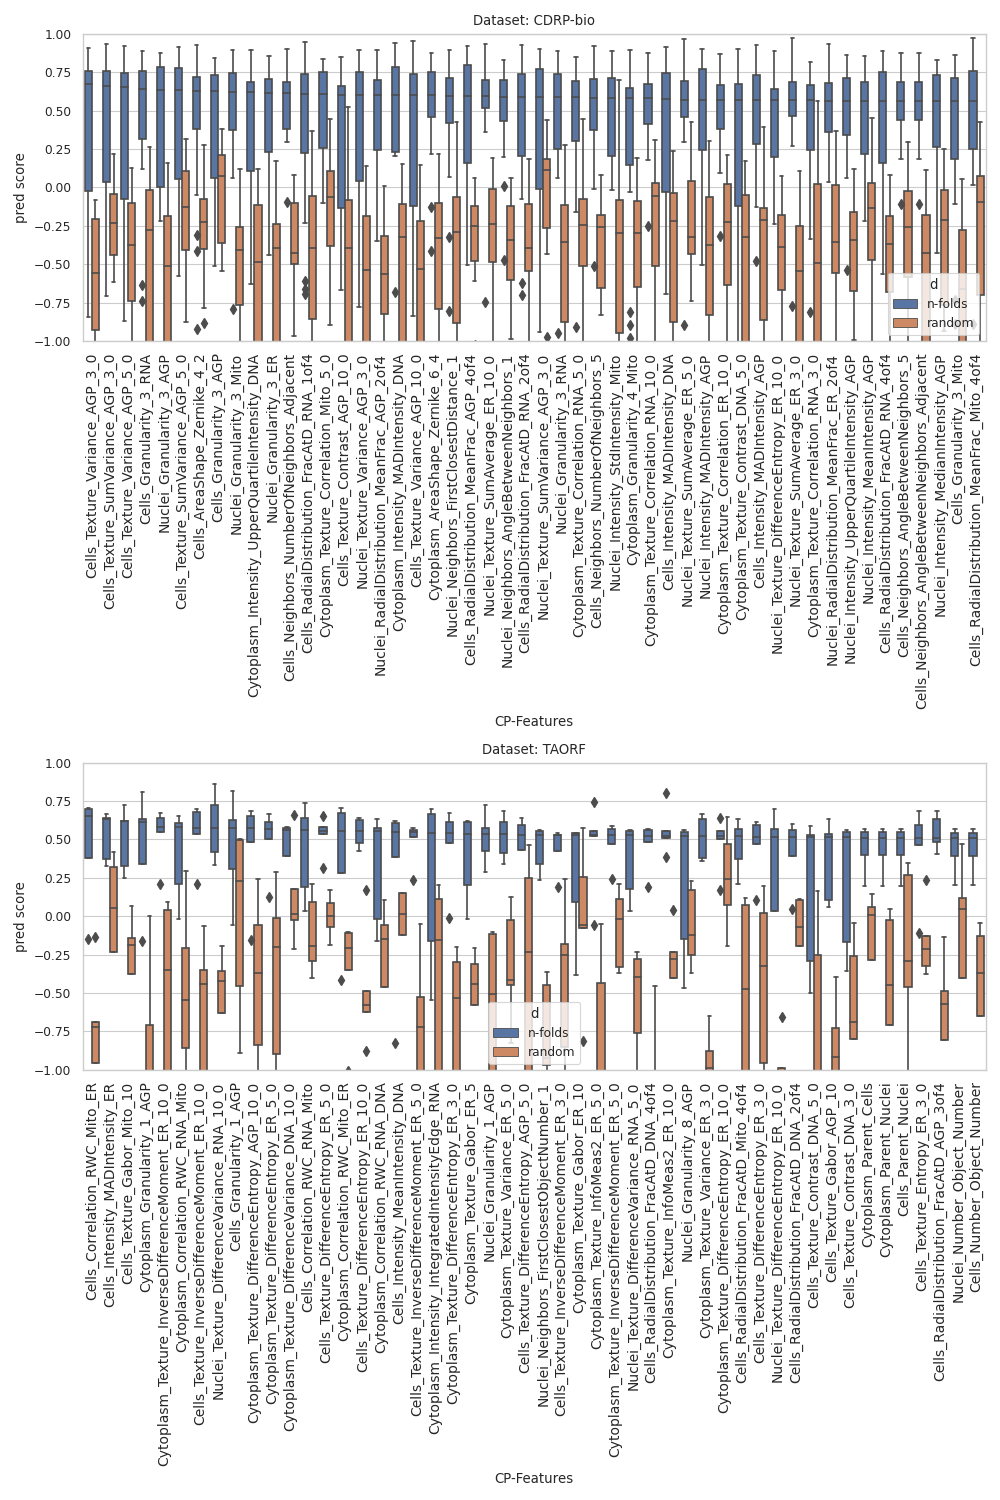

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<IPython.core.display.Javascript object>


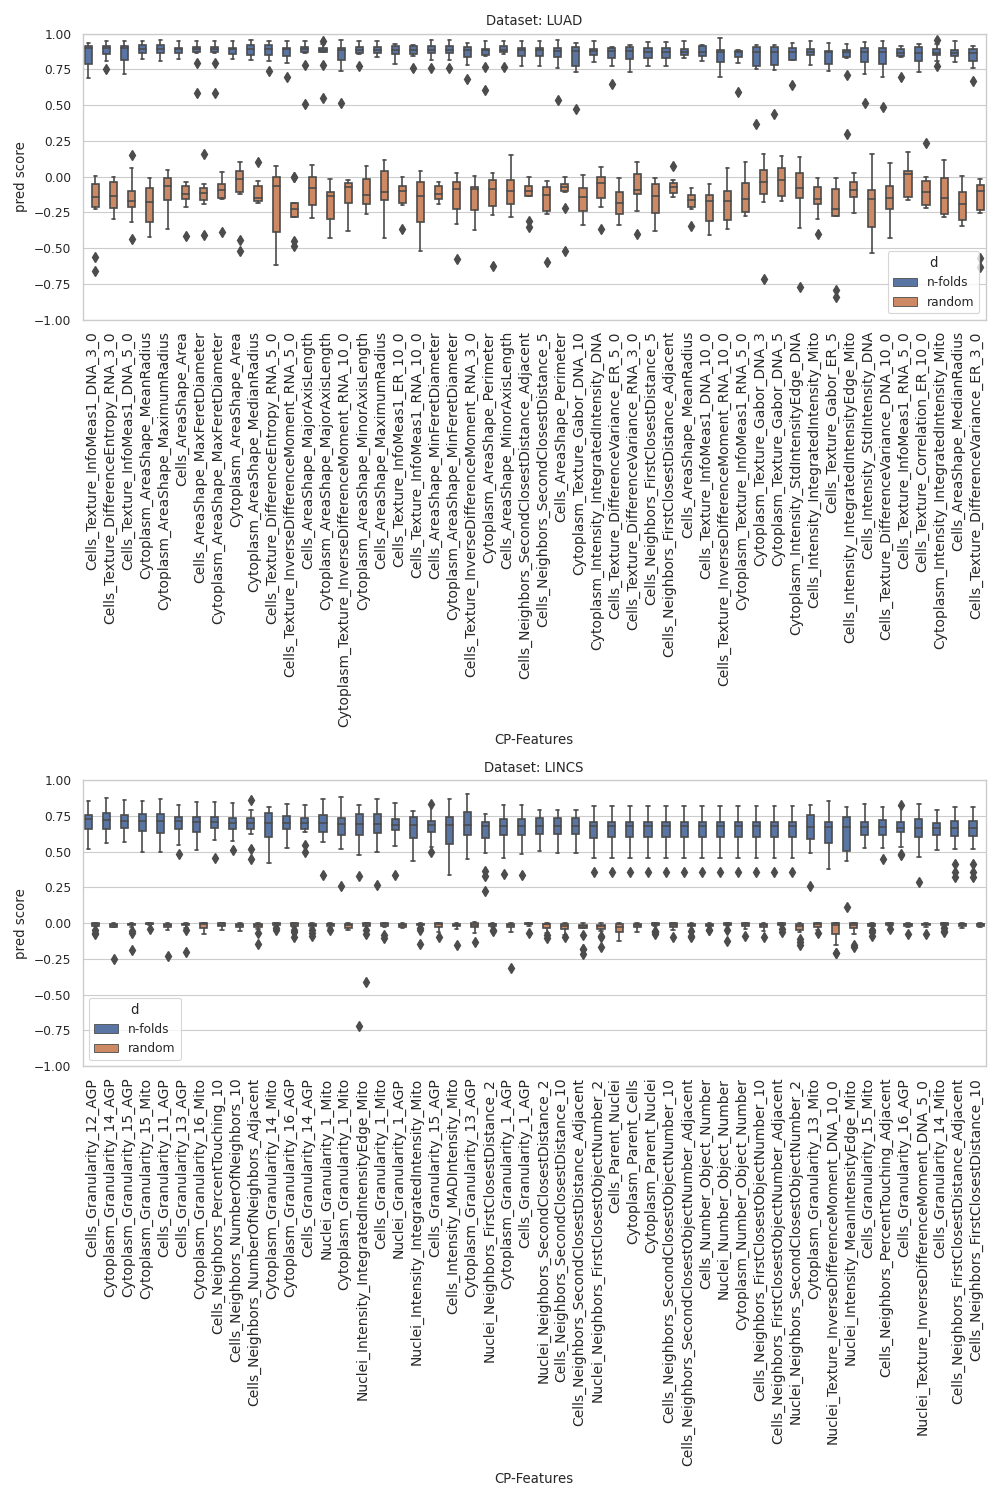

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [542]:
datasets=['CDRP-bio' , 'TAORF']
models=["Lasso"]
f='-filt';#'-filt'

fig, axes = plt.subplots(len(datasets),1,figsize=(10,15))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        dataset_meth_dists=DataPredResults_appC[(DataPredResults_appC['Dataset']==datasets[d]) &\
                                                    (DataPredResults_appC['Model']==models[m])]
#         kjhlhjl
#         CP-Features
        sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['CP-Features','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
        top_lmGenes=sorted_gene_mean_scores['CP-Features'].tolist()[0:50]
        dataset_meth_dists_top_50=dataset_meth_dists[dataset_meth_dists['CP-Features'].isin(top_lmGenes)]
        
#         f, axes = plt.subplots(figsize=(15,4))
        axes[d].set_title("Dataset: "+datasets[d])
        sns.boxplot(x="CP-Features", y="pred score",hue="d", data=dataset_meth_dists_top_50,ax=axes[d],order=top_lmGenes)
        # ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
        axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
        axes[d].set_ylim(-1, 1)
        
fig.tight_layout()
fig.savefig('appendix_C1.eps')

datasets=['LUAD','LINCS']
fig, axes = plt.subplots(len(datasets),1,figsize=(10,15))
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.rcParams['patch.force_edgecolor'] = True
# for d in range(5):#(len(datasets)):
for d in range(len(datasets)):
    for m in range(len(models)):
        dataset_meth_dists=DataPredResults_appC[(DataPredResults_appC['Dataset']==datasets[d]) &\
                                                    (DataPredResults_appC['Model']==models[m])]
#         kjhlhjl
#         CP-Features
        sorted_gene_mean_scores=dataset_meth_dists[dataset_meth_dists['d']=='n-folds'].groupby(['CP-Features','d']).median().reset_index().sort_values(by=['pred score'],ascending=False)
        top_lmGenes=sorted_gene_mean_scores['CP-Features'].tolist()[0:50]
        dataset_meth_dists_top_50=dataset_meth_dists[dataset_meth_dists['CP-Features'].isin(top_lmGenes)]
        
#         f, axes = plt.subplots(figsize=(15,4))
        axes[d].set_title("Dataset: "+datasets[d])
        sns.boxplot(x="CP-Features", y="pred score",hue="d", data=dataset_meth_dists_top_50,ax=axes[d],order=top_lmGenes)
        # ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
        axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
        axes[d].set_ylim(-1, 1)
        
fig.tight_layout()
fig.savefig('appendix_C2.eps')

In [532]:
dataset_meth_dists

,Dataset,Model,Unnamed: 0,CP-Features,pred score,d
0,CDRP-bio,Lasso,0.0,Nuclei_Correlation_K_AGP_Mito,0.598645,n-folds
1,CDRP-bio,Lasso,1.0,Nuclei_Correlation_K_AGP_Mito,0.562363,n-folds
2,CDRP-bio,Lasso,2.0,Nuclei_Correlation_K_AGP_Mito,0.147169,n-folds
3,CDRP-bio,Lasso,3.0,Nuclei_Correlation_K_AGP_Mito,0.699455,n-folds
4,CDRP-bio,Lasso,4.0,Nuclei_Correlation_K_AGP_Mito,0.645042,n-folds
...,...,...,...,...,...,...
62795,CDRP-bio,Lasso,62795.0,Nuclei_Texture_Gabor_Mito_3,-0.376406,random
62796,CDRP-bio,Lasso,62796.0,Nuclei_Texture_Gabor_Mito_3,-1.148859,random
62797,CDRP-bio,Lasso,62797.0,Nuclei_Texture_Gabor_Mito_3,-0.728146,random
62798,CDRP-bio,Lasso,62798.0,Nuclei_Texture_Gabor_Mito_3,-0.003042,random


### Single Gene prediction cross validation

(-1.0, 1.0)

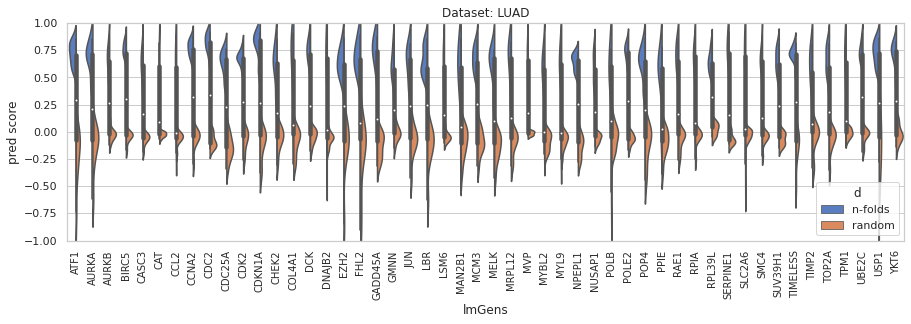

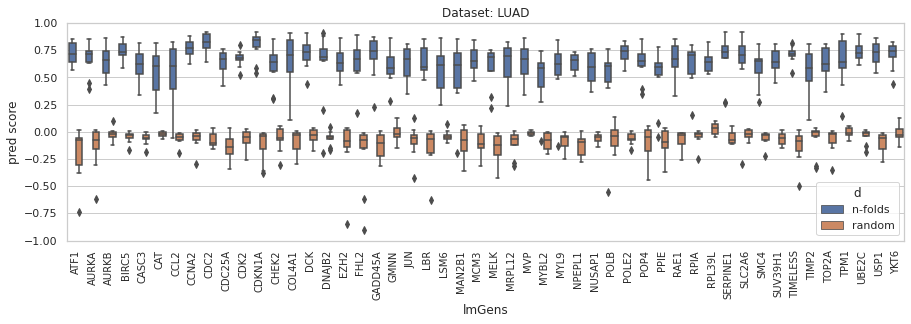

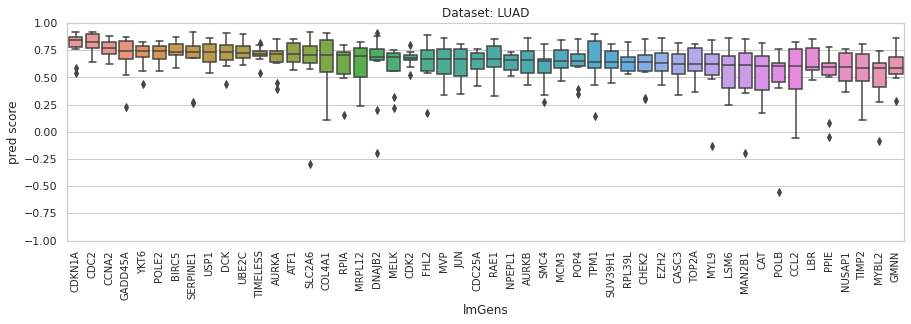

In [209]:
# k_fold=10
# pred_df=pd.DataFrame(index=range(k_fold),columns=l1k_features)
# pred_df_rand=pd.DataFrame(index=range(k_fold),columns=l1k_features)
# for l in l1k_features:
#     scores,scores_rand=lasso_cv(cp[cp_features],l1k[l],k_fold)
#     pred_df[l]=scores
#     pred_df_rand[l]=scores_rand

########################### mapping prob_ids to genes names    
meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
meta_gene_probID=meta.set_index('probe_id')
d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
pred_df = pred_df.rename(columns=d)    
pred_df_rand = pred_df_rand.rename(columns=d)  

########################### plot prediction scores sorted by the median across all folds scores
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lmGens','value':'pred score'})
highPredDF_rand=pd.melt(pred_df_rand[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lmGens','value':'pred score'})

highPredDF['d']="n-folds"
highPredDF_rand['d']="random"
tips2 = pd.concat([highPredDF_rand,highPredDF],ignore_index=True).reset_index(drop=True)
tips2=pd.merge(meta_geneFamilyU,tips2,how='right',on=["lmGens"])
highPredDF=pd.merge(meta_geneFamilyU,highPredDF,how='right',on=["lmGens"])
tips2["d"]=tips2["d"].astype('category')
tips2["gene_group_name"]=tips2["gene_group_name"].astype('category')
tips2["lmGens"]=tips2["lmGens"].astype('category')
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
# sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
######
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score",hue="d", data=tips2,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lmGens", y="pred score", data=highPredDF,ax=axes)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(-1, 1)
# ########################### evluation based on Correlation with protein abundance
# prot_gen_cor=pd.read_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/proteome-transcriptome-abundance/Table_EV2_corrs.csv',index_col='Unnamed: 0')
# # sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))

# sorted_gene_mean_scores2=sorted_gene_mean_scores.set_index('index')
# pred_eval_df=pd.concat([prot_gen_cor.loc[common_genes,:], sorted_gene_mean_scores2.loc[common_genes,:]], axis=1)
# pred_eval_cc=scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
# axes.set_title("Dataset: "+dataset+"  , eval metric: "+str(np.round(pred_eval_cc,3)));

# ########################## Save prediction score results
# filename='../../results/SingleGenePred/scores.xlsx'
# # saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'lm_Gens',0:'pred_score'}),'Lasso-'+dataset)

(-1.0, 1.0)

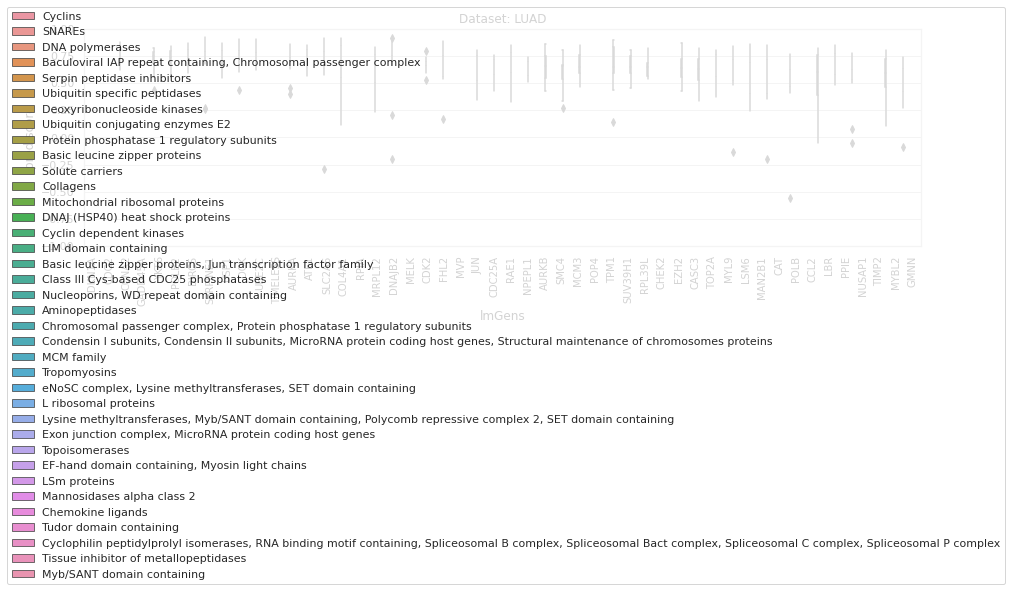

In [217]:
#####
f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
g=sns.boxplot(x="lmGens", y="pred score",hue="gene_group_name", data=highPredDF,ax=axes)
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
# ax = sns.violinplot(x="lmGens", y="pred score", hue="d",data=tips2, palette="muted", split=True)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
# g._legend.remove()
# plt.legend([],[], frameon=False)
axes.set_ylim(-1, 1)

# highPredDF

In [229]:
# highPredDF.groupby(["gene_group_name"]).size()
highPredDF[highPredDF["gene_group_name"].isnull()].shape

(120, 4)

In [231]:
highPredDF.lmGens.unique()

array(['CDKN1A', 'CDC2', 'CCNA2', 'GADD45A', 'YKT6', 'POLE2', 'BIRC5',
       'SERPINE1', 'USP1', 'DCK', 'UBE2C', 'TIMELESS', 'AURKA', 'ATF1',
       'SLC2A6', 'COL4A1', 'RPIA', 'MRPL12', 'DNAJB2', 'MELK', 'CDK2',
       'FHL2', 'MVP', 'JUN', 'CDC25A', 'RAE1', 'NPEPL1', 'AURKB', 'SMC4',
       'MCM3', 'POP4', 'TPM1', 'SUV39H1', 'RPL39L', 'CHEK2', 'EZH2',
       'CASC3', 'TOP2A', 'MYL9', 'LSM6', 'MAN2B1', 'CAT', 'POLB', 'CCL2',
       'LBR', 'PPIE', 'NUSAP1', 'TIMP2', 'MYBL2', 'GMNN'], dtype=object)

In [8]:
# scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
saved_scores=pd.read_excel('../../results/SingleGenePred/scores.xlsx', sheet_name=None)
saved_scores_lasso=saved_scores['Lasso-'+dataset]
saved_scores_lasso.head()

,Unnamed: 0,lm_Gens,pred_score
0,143,CDKN1A,0.845959
1,136,CDC2,0.827220
2,115,CCNA2,0.771751
3,322,GADD45A,0.747613
4,963,YKT6,0.746184


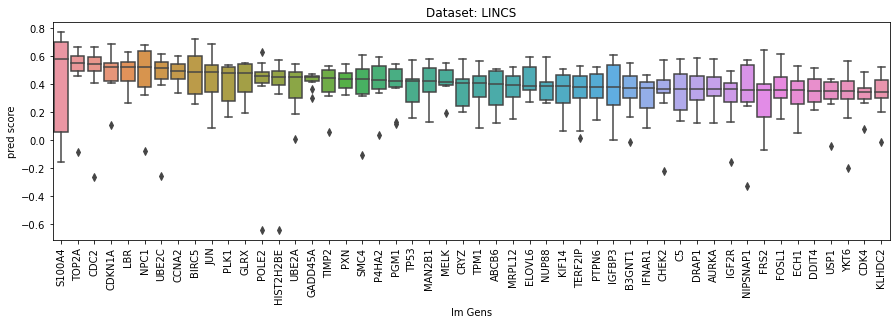

In [114]:
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:50]['index'].values.tolist()]).rename(columns={'variable':'lm Gens','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);

### Correlation with protein abundance

In [47]:
# sorted_gene_mean_scores2
l1k[l].sample(frac = 1) 

96    -0.584397
132    0.400269
54     0.005120
161   -0.164447
26    -1.069135
         ...   
139    0.335050
91    -0.589123
206   -0.042516
17     0.277244
202   -0.053090
Name: 204812_at, Length: 213, dtype: float64

In [102]:
# highPredDF

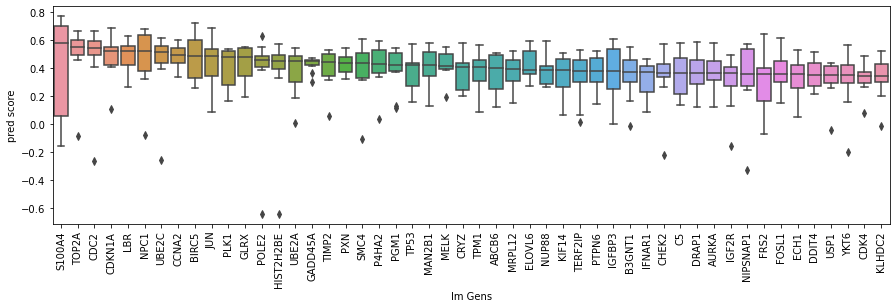

In [113]:
f, axes = plt.subplots(figsize=(15,4))

# for d in range(len(doses)):
#     sns.boxplot(x="Metadata_moa", y="fVal", hue="fName", \
#                 data=df_grouped_bxplt[df_grouped_bxplt['Metadata_mg_per_ml_rounded']==doses[d]].reset_index(drop=True), palette="Set1",ax=axes[d])
#     axes[d].set_title("Dose: "+str(doses[d]))
#     axes[d].set_xticklabels(axes[d].get_xticklabels(),rotation=90,fontsize=10);
#     axes[d].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
sns.boxplot(x="lm Gens", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);

In [54]:
scores

array([0.38638464, 0.27816457, 0.39661721, 0.27745571, 0.26364289,
       0.14565819, 0.27624536, 0.19623219, 0.30090798, 0.15817473])

In [32]:
np.any(np.isnan(cp[cp_features[0:100]].values))

True

In [42]:
np.any(np.isnan(cp[cp_features].values))

True

In [37]:
cp.interpolate(method="linear", inplace=True)

In [22]:
cp=mergProf_treatLevel.copy()
cols2removeCP=[i for i in cp_features if (cp[i].isnull().sum(axis=0)/cp.shape[0])>0.05]
print(cols2removeCP)
cp=cp.drop(cols2removeCP, axis=1);
cp_features2 = list(set(cp_features) - set(cols2removeCP))
cp[cp_features2]=cp[cp_features2].interpolate()
cols2removeCP=[i for i in cp_features2 if cp[i].isnull().sum(axis=0)>0]
print(cols2removeCP)

[]
[]


In [10]:
mergProf_treatLevel.drop_duplicates(subset=None, keep="first", inplace=False).shape
# mergProf_treatLevel

(1141, 2726)

### Single CP feature prediction cross validation

In [ ]:
k_fold=20
pred_df=pd.DataFrame(index=range(k_fold),columns=cp_features)
for c in cp_features:
    scores=lasso_cv(l1k[l1k_features],cp[c],k_fold)
    pred_df[c]=scores

# ########################### mapping prob_ids to genes names    
# meta=pd.read_csv("/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/affy_probe_gene_mapping.txt",delimiter="\t",header=None, names=["probe_id", "gene"])
# meta_gene_probID=meta.set_index('probe_id')
# d = dict(zip(meta_gene_probID.index, meta_gene_probID['gene']))
# pred_df = pred_df.rename(columns=d)    
    
########################### plot prediction scores sorted by the median across all folds scores
sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
highPredDF=pd.melt(pred_df[sorted_gene_mean_scores[0:80]['index'].values.tolist()]).rename(columns={'variable':'CP feats','value':'pred score'})

f, axes = plt.subplots(figsize=(15,4))
axes.set_title("Dataset: "+dataset)
sns.boxplot(x="CP feats", y="pred score", data=highPredDF,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=10);
axes.set_ylim(0, 1)


# ########################### evluation based on Correlation with protein abundance
# prot_gen_cor=pd.read_csv('/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/metadata/proteome-transcriptome-abundance/Table_EV2_corrs.csv',index_col='Unnamed: 0')
# # sorted_gene_mean_scores=pred_df.median().reset_index().sort_values(by=[0],ascending=False)
# common_genes=list(set(sorted_gene_mean_scores['index'].values) & set(prot_gen_cor.index))

# sorted_gene_mean_scores2=sorted_gene_mean_scores.set_index('index')
# pred_eval_df=pd.concat([prot_gen_cor.loc[common_genes,:], sorted_gene_mean_scores2.loc[common_genes,:]], axis=1)
# pred_eval_cc=scipy.stats.pearsonr(np.squeeze(pred_eval_df["corr1"].values), np.squeeze(pred_eval_df[0].values))[0]
# axes.set_title("Dataset: "+dataset+"  , eval metric: "+str(np.round(pred_eval_cc,3)));

########################## Save prediction score results
filename='../../results/SingleCPfeatPred/scores.xlsx'
saveAsNewSheetToExistingFile(filename,sorted_gene_mean_scores.rename(columns={'index':'CP feats',0:'pred_score'}),'Lasso-'+dataset)

In [26]:
dataset

'LINCS'

In [27]:
saved_scores=pd.read_excel('../../results/SingleCPfeatPred/scores.xlsx', sheet_name=None)
saved_scores_lasso=saved_scores['Lasso-'+dataset]
saved_scores_lasso.head()

,Unnamed: 0,CP feats,pred_score
0,138,Cytoplasm_Granularity_16_AGP,0.740094
1,580,Cells_Granularity_12_AGP,0.736100
2,1541,Cytoplasm_Granularity_15_Mito,0.733307
3,486,Cells_Granularity_14_AGP,0.728269
4,108,Nuclei_Texture_InverseDifferenceMoment_DNA_10_0,0.727391


In [28]:
# Potentail visually interpretable features 
v_i_f_list=["Cells_AreaShape_Eccentricity",
    "Nuclei_AreaShape_Area", "Cytoplasm_AreaShape_Area", "Cells_AreaShape_Area",
    "Cells_RadialDistribution_MeanFrac_Mito_4of4",
    "Cells_Intensity_MassDisplacement_AGP",
    "Nuclei_Granularity_1_DNA",
    "Cells_Intensity_MeanIntensityEdge_AGP"]

In [37]:
v_i_f_list2=["Nuclei_AreaShape_Eccentricity",
    "Nuclei_AreaShape_Area", "Cytoplasm_AreaShape_Area", "Cells_AreaShape_Area",
    "Cells_RadialDistribution_MeanFrac_Mito_4of4",
    "Nuclei_Intensity_MassDisplacement_DNA",
    "Cells_Granularity_1_AGP",
    "Cells_Intensity_MeanIntensityEdge_AGP"]

In [38]:
saved_scores_lasso[saved_scores_lasso["CP feats"].isin(v_i_f_list2)]

,Unnamed: 0,CP feats,pred_score
17,309,Cells_Granularity_1_AGP,0.708425
86,1496,Nuclei_AreaShape_Area,0.665405
200,1253,Cells_RadialDistribution_MeanFrac_Mito_4of4,0.598590
220,149,Nuclei_Intensity_MassDisplacement_DNA,0.591571
321,118,Cells_AreaShape_Area,0.556702
338,403,Cytoplasm_AreaShape_Area,0.552584
549,1348,Nuclei_AreaShape_Eccentricity,0.477723
827,1616,Cells_Intensity_MeanIntensityEdge_AGP,0.401995


In [36]:
saved_scores_lasso[saved_scores_lasso["CP feats"].isin(['Nuclei_Intensity_MassDisplacement_AGP',
       'Nuclei_Intensity_MassDisplacement_ER',
       'Cytoplasm_Intensity_MassDisplacement_DNA',
       'Nuclei_Intensity_MassDisplacement_DNA',
       'Cells_Intensity_MassDisplacement_AGP',
       'Cytoplasm_Intensity_MassDisplacement_Mito',
       'Nuclei_Intensity_MassDisplacement_Mito',
       'Nuclei_Intensity_MassDisplacement_RNA',
       'Cytoplasm_Intensity_MassDisplacement_ER',
       'Cells_Intensity_MassDisplacement_DNA',
       'Cells_Intensity_MassDisplacement_ER',
       'Cytoplasm_Intensity_MassDisplacement_RNA',
       'Cytoplasm_Intensity_MassDisplacement_AGP',
       'Cells_Intensity_MassDisplacement_RNA',
       'Cells_Intensity_MassDisplacement_Mito'])]

,Unnamed: 0,CP feats,pred_score
220,149,Nuclei_Intensity_MassDisplacement_DNA,0.591571
332,205,Cytoplasm_Intensity_MassDisplacement_Mito,0.553412
467,1522,Cytoplasm_Intensity_MassDisplacement_AGP,0.507992
537,279,Cells_Intensity_MassDisplacement_Mito,0.482051
696,1628,Nuclei_Intensity_MassDisplacement_Mito,0.437292
898,808,Cells_Intensity_MassDisplacement_AGP,0.382221
1061,909,Nuclei_Intensity_MassDisplacement_RNA,0.333328
1071,232,Cytoplasm_Intensity_MassDisplacement_ER,0.330362
1124,882,Cells_Intensity_MassDisplacement_ER,0.314702
1144,1526,Cells_Intensity_MassDisplacement_RNA,0.306929


### Check Synth Images results

In [124]:
file_sources='/home/ubuntu/bucket/projects/2018_04_20_Rosetta/workspace/results/sample_cells/results/Marzieh_Test_eval.csv'
res_synth_clus=pd.read_csv(file_sources)
res_synth_clus['user_inputs']=res_synth_clus['user_inputs'].astype('str')
res_synth_clus['true_class']=res_synth_clus['true_class'].astype('str')

res_synth_clus

,im_list,user_inputs,true_class
0,real_2-1-0-7-6-4-3-5-8-9.png,12345.0,2107643589
1,real_2-6-3-4-5-9-0-7-8-1.png,3463546.0,2634590781
2,real_4-2-6-7-1-0-9-3-5-8.png,567567.0,4267109358
3,real_4-6-8-0-3-2-9-5-1-7.png,22345678.0,4680329517
4,real_5-6-3-9-8-2-4-0-1-7.png,8765432.0,5639824017
5,real_6-2-1-5-7-4-9-0-8-3.png,3456789.0,6215749083
6,real_6-8-4-3-1-7-9-0-2-5.png,234567.0,6843179025
7,real_6-8-9-1-2-7-4-5-0-3.png,345678.0,6891274503
8,real_7-1-8-0-2-5-9-3-4-6.png,345678.0,7180259346
9,real_7-6-4-3-5-8-9-2-1-0.png,98765.0,7643589210


In [122]:
res_synth_clus.dtypes

im_list        object
user_inputs    object
true_class      int64
dtype: object

In [108]:
ls /home/

ubuntu/
